# Tweedie Regression

Tweedie regression models (TRMs) are flexible tools to deal with non-negative right-skewed data and can handle semi-continuous data, that is, continuous data with probability mass at zero. The geometric sums of Tweedie random variables lead to the geometric Tweedie distributions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns
from pandas import read_csv
from pandas.plotting import scatter_matrix

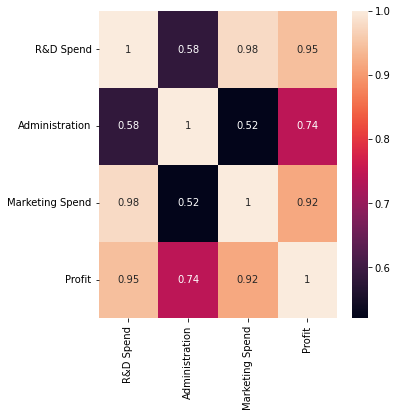

In [3]:
df = pd.read_csv("1000_Companies.csv")
sns.displot(df.Profit)
sns.heatmap(df.corr(), annot=True)
for x in ["Profit"]:
    q75, q25 = np.percentile(df.loc[:, x], [75, 25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min, x] = np.nan
    df.loc[df[x] > max, x] = np.nan
#drop alll the rows that have null values
df.dropna(inplace=True)
#check the datatypes
df.dtypes
#convert the State column
df = pd.get_dummies(df, drop_first=True)
X = df.drop("Profit", axis=1)
y = df["Profit"]


In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=1)
from sklearn import linear_model
model = linear_model.TweedieRegressor(max_iter=500).fit(X_train,y_train)
model.score(X_train,y_train)
#predict
y_pred = model.predict(X_test)
#Evaluation 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
mean_absolute_error(y_pred,y_test)
mean_absolute_error(y_pred,y_test)

528.3728369326236

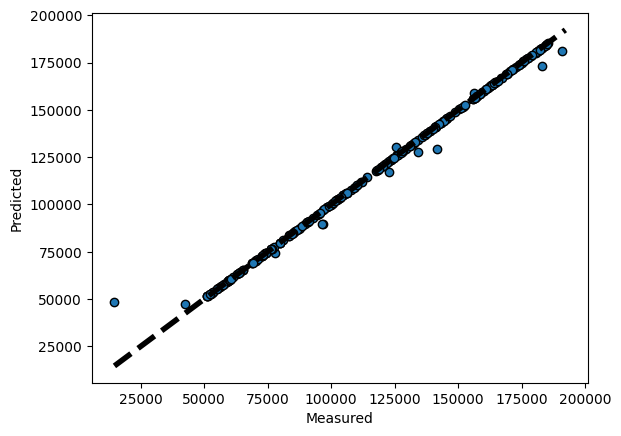

In [5]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()